In [1]:
# %load_ext autoreload
# %autoreload 2

In [2]:
import sys
import pandas as pd
from IPython.display import display, HTML
%config InlineBackend.figure_format='retina'
sys.path.insert(0, '/data/useful/scripts')
from data_fit import Fit

#### importing data for the standard curve

`make sure the separator is a comma "," and not a semicolon ";"`

In [3]:
###### this is where you put the full path to data ########
path_std = "/data/Anita/insulin_std_curve.csv"
###########################################################
std_data = pd.read_csv(path_std)
display(HTML("This is data for the standard curve:"))
display(std_data)

if "concentration" != std_data.columns[0]:
    raise ValueError("The file needs to have the first column named 'concentration'")
    
other_cols = std_data.columns[1:]
for i,col in enumerate(other_cols):
    if col != f"measurement_{i+1}":
        raise ValueError("Columns after 'concentration' need to be 'measurement_1', 'measurement_2', etc. This does not seem to be the case here.")

,concentration,measurement_1,measurement_2,measurement_3
0,8.000,9568.663286,10237.112600,9742.764719
1,3.200,5884.202795,5376.647247,5211.999080
2,1.280,2848.607912,3103.859475,2981.032699
3,0.512,2032.260668,1501.050107,1649.896685
4,0.205,1422.564071,1451.817180,1144.787606
5,0.082,884.739977,1069.191470,1154.083789
6,0.033,1033.090240,844.169203,836.418255
7,0.000,933.480664,971.778190,784.971661


#### Tidy

In [4]:
std_tidy = []
for i, col in enumerate(other_cols):
    df = std_data[['concentration',col]].copy()

    df = df.rename(columns={col:"measurement"})
    df['replicate'] = i+1
    std_tidy += [df]
std_tidy = pd.concat(std_tidy, ignore_index=True)

#### Fit

In [20]:
fit = Fit(std_tidy)

/home/srdjan/github/Physio_Ca/notebooks/data_fit.py:170: UserWarning: FixedFormatter should only be used together with FixedLocator


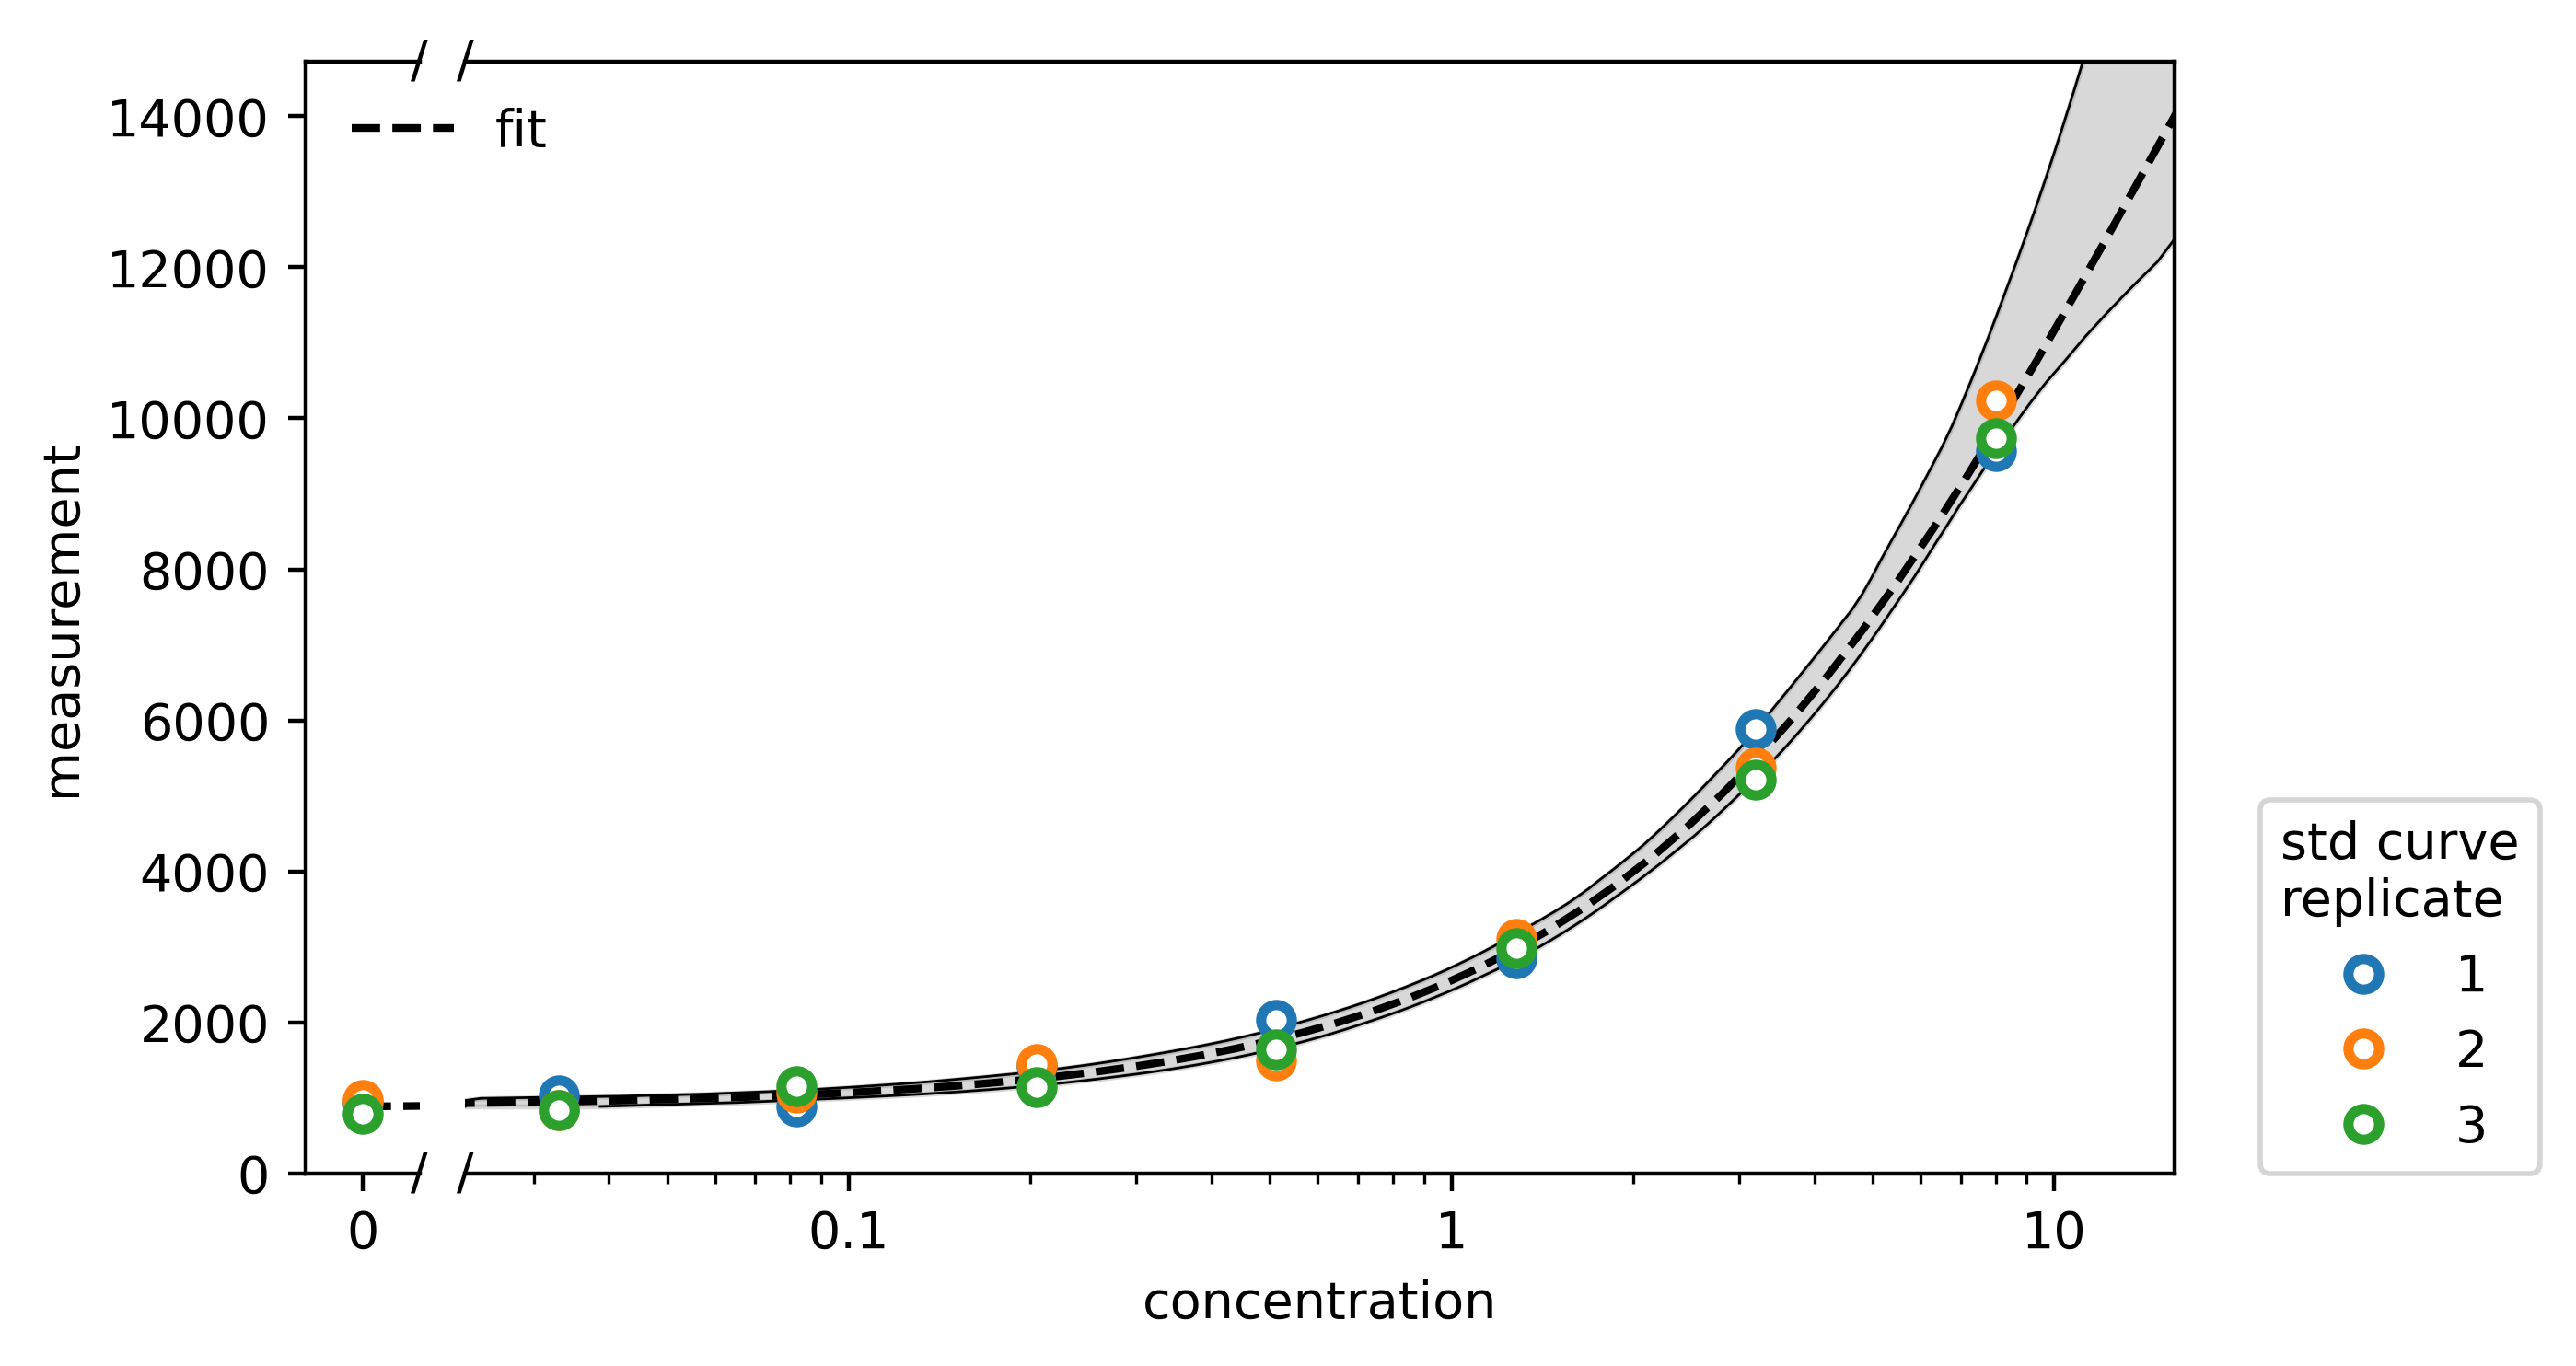

In [22]:
fig, axs = fit.plot()

#### importing the measurements for which you need to infer the concentration

In [23]:
path_infer = "/data/Anita/measurement.csv"
infer_data = pd.read_csv(path_infer)
display(HTML("These are the measurements you wish to infer"))
display(infer_data)

if "measurement" != infer_data.columns[0]:
    raise ValueError("The file needs to have the first column named 'measurement'. The other columns are irrelevant")

infer_data["measurement"] = infer_data["measurement"].astype("float")

for col in infer_data.columns[1:]:
    infer_data[col] = infer_data[col].astype(str)

,measurement,sample_ID
0,871.384693,tg 16.2.
1,854.447354,tg 14.2.
2,876.482259,tg 17.1.
3,1209.416555,wt 12.1.
4,910.771488,wt 8.2.
5,15625.364600,human 16mM 1:10
6,16665.549810,human 16mM 1:10
7,16659.454590,human 16mM 1:10
8,15175.293240,human 16mM 1:10


#### Results results

In [42]:
infer_data["inferred"] = fit.infer_values(infer_data['measurement'])

In [43]:
infer_data["inferred_lowerCI"], infer_data["inferred_upperCI"] = fit.infer_confidence_intervals(infer_data['measurement'])

/home/srdjan/github/Physio_Ca/notebooks/data_fit.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator


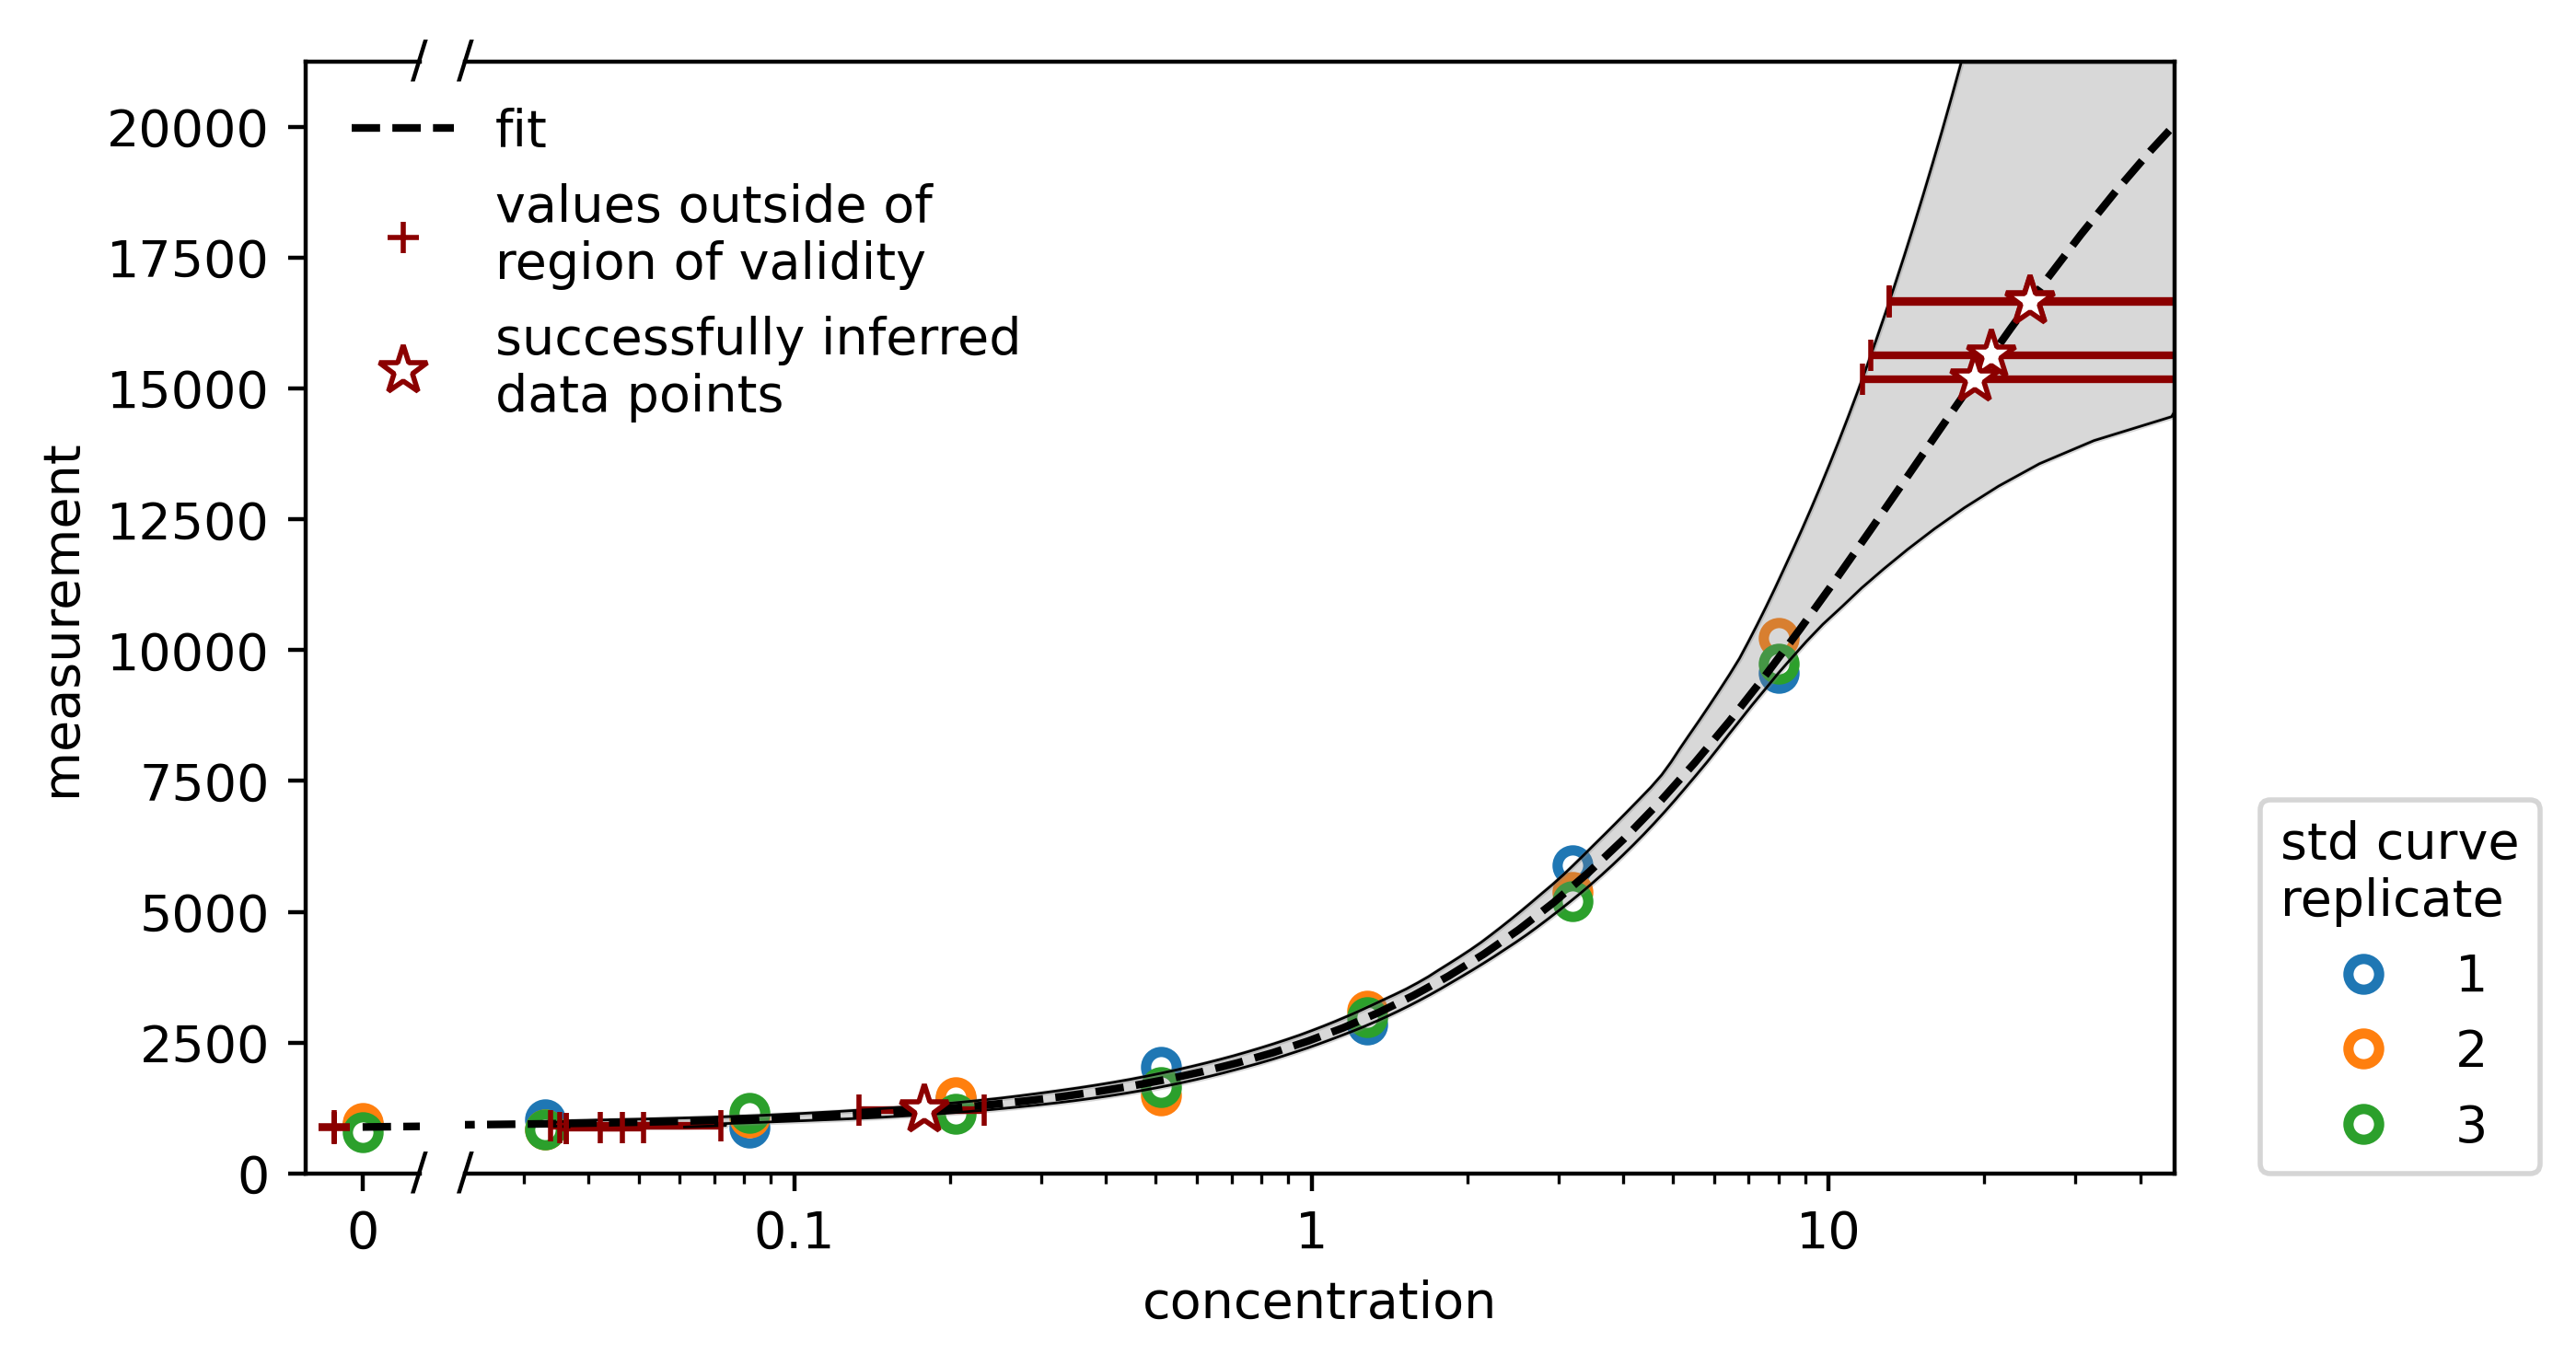

In [45]:
fig, axs = fit.plot(infer_data=infer_data)

##### if you wish to save the figure

`note that you need full path to figure file(s)!`

In [46]:
# as a png
fig.savefig("/data/Anita/inference.png")

In [47]:
# or pdf:
# fig.savefig("/data/Anita/inference.pdf")

In [48]:
# or svg:
# fig.savefig("/data/Anita/inference.svg")

SVG is good if you plan to edit the figure further with e.g. [InkScape](https://inkscape.org/)

##### if you wish to save the inferred values into a different csv

In [49]:
output = path_infer.replace(".csv", "_inferred.csv")
infer_data.to_csv(output)
print ("Saved under", output)

Saved under /data/Anita/measurement_inferred.csv
